In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [2]:
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv("fake_job_postings _P2.csv")

In [4]:
df.head(10) # Displaying the first 10 rows of the DataFrame 'df'

,job_id,title,location,department,salary_range,company_profile,description,requirements,benefits,telecommuting,has_company_logo,has_questions,employment_type,required_experience,required_education,industry,function,fraudulent
0,1,Marketing Intern,"US, NY, New York",Marketing,NaN,"We're Food52, and we've created a groundbreaki...","Food52, a fast-growing, James Beard Award-winn...",Experience with content management systems a m...,NaN,0,1,0,Other,Internship,NaN,NaN,Marketing,0
1,2,Customer Service - Cloud Video Production,"NZ, , Auckland",Success,NaN,"90 Seconds, the worlds Cloud Video Production ...",Organised - Focused - Vibrant - Awesome!Do you...,What we expect from you:Your key responsibilit...,What you will get from usThrough being part of...,0,1,0,Full-time,Not Applicable,NaN,Marketing and Advertising,Customer Service,0
2,3,Commissioning Machinery Assistant (CMA),"US, IA, Wever",NaN,NaN,Valor Services provides Workforce Solutions th...,"Our client, located in Houston, is actively se...",Implement pre-commissioning and commissioning ...,NaN,0,1,0,NaN,NaN,NaN,NaN,NaN,0
3,4,Account Executive - Washington DC,"US, DC, Washington",Sales,NaN,Our passion for improving quality of life thro...,THE COMPANY: ESRI – Environmental Systems Rese...,"EDUCATION: Bachelor’s or Master’s in GIS, busi...",Our culture is anything but corporate—we have ...,0,1,0,Full-time,Mid-Senior level,Bachelor's Degree,Computer Software,Sales,0
4,5,Bill Review Manager,"US, FL, Fort Worth",NaN,NaN,SpotSource Solutions LLC is a Global Human Cap...,JOB TITLE: Itemization Review ManagerLOCATION:...,QUALIFICATIONS:RN license in the State of Texa...,Full Benefits Offered,0,1,1,Full-time,Mid-Senior level,Bachelor's Degree,Hospital & Health Care,Health Care Provider,0
5,6,Accounting Clerk,"US, MD,",NaN,NaN,NaN,Job OverviewApex is an environmental consultin...,NaN,NaN,0,0,0,NaN,NaN,NaN,NaN,NaN,0
6,7,Head of Content (m/f),"DE, BE, Berlin",ANDROIDPIT,20000-28000,"Founded in 2009, the Fonpit AG rose with its i...",Your Responsibilities: Manage the English-spea...,Your Know-How: ...,Your Benefits: Being part of a fast-growing co...,0,1,1,Full-time,Mid-Senior level,Master's Degree,Online Media,Management,0
7,8,Lead Guest Service Specialist,"US, CA, San Francisco",NaN,NaN,Airenvy’s mission is to provide lucrative yet ...,Who is Airenvy?Hey there! We are seasoned entr...,"Experience with CRM software, live chat, and p...",Competitive Pay. You'll be able to eat steak e...,0,1,1,NaN,NaN,NaN,NaN,NaN,0
8,9,HP BSM SME,"US, FL, Pensacola",NaN,NaN,Solutions3 is a woman-owned small business who...,Implementation/Configuration/Testing/Training ...,MUST BE A US CITIZEN.An active TS/SCI clearanc...,NaN,0,1,1,Full-time,Associate,NaN,Information Technology and Services,NaN,0
9,10,Customer Service Associate - Part Time,"US, AZ, Phoenix",NaN,NaN,"Novitex Enterprise Solutions, formerly Pitney ...",The Customer Service Associate will be based i...,Minimum Requirements:Minimum of 6 months custo...,NaN,0,1,0,Part-time,Entry level,High School or equivalent,Financial Services,Customer Service,0


In [5]:
df.describe() #statistics of the DataFrame 

,job_id,telecommuting,has_company_logo,has_questions,fraudulent
count,17880.000000,17880.000000,17880.000000,17880.000000,17880.000000
mean,8940.500000,0.042897,0.795302,0.491723,0.048434
std,5161.655742,0.202631,0.403492,0.499945,0.214688
min,1.000000,0.000000,0.000000,0.000000,0.000000
25%,4470.750000,0.000000,1.000000,0.000000,0.000000
50%,8940.500000,0.000000,1.000000,0.000000,0.000000
75%,13410.250000,0.000000,1.000000,1.000000,0.000000
max,17880.000000,1.000000,1.000000,1.000000,1.000000


In [6]:
df.dtypes #retrieving the data types of each column in the DataFrame

job_id                  int64
title                  object
location               object
department             object
salary_range           object
company_profile        object
description            object
requirements           object
benefits               object
telecommuting           int64
has_company_logo        int64
has_questions           int64
employment_type        object
required_experience    object
required_education     object
industry               object
function               object
fraudulent              int64
dtype: object

In [7]:
df.duplicated().any()
df.drop_duplicates(inplace = True) # Checking if there are any duplicated rows in the DataFrame and dropping them if found.

In [8]:
# Check for null values in the entire DataFrame
null_values = df.isnull().sum()
print("Null values in the entire DataFrame:")
print(null_values)

Null values in the entire DataFrame:
job_id                     0
title                      0
location                 346
department             11547
salary_range           15012
company_profile         3308
description                1
requirements            2696
benefits                7212
telecommuting              0
has_company_logo           0
has_questions              0
employment_type         3471
required_experience     7050
required_education      8105
industry                4903
function                6455
fraudulent                 0
dtype: int64


In [9]:
dropping_columns = ['salary_range','department'] #as the above two columns had more null values, we are dropping them
df = df.drop(dropping_columns, axis=1)

In [10]:
import pandas as pd

# Extract country from the 'location' column and create a new 'Country' column
df['countries'] = df['location'].apply(lambda x: x.split(',')[0].strip() if isinstance(x, str) else x)

# Now, let's check the DataFrame to ensure the 'Country' column is created correctly
df.drop(columns=['location'], inplace=False)

,job_id,title,company_profile,description,requirements,benefits,telecommuting,has_company_logo,has_questions,employment_type,required_experience,required_education,industry,function,fraudulent,countries
0,1,Marketing Intern,"We're Food52, and we've created a groundbreaki...","Food52, a fast-growing, James Beard Award-winn...",Experience with content management systems a m...,NaN,0,1,0,Other,Internship,NaN,NaN,Marketing,0,US
1,2,Customer Service - Cloud Video Production,"90 Seconds, the worlds Cloud Video Production ...",Organised - Focused - Vibrant - Awesome!Do you...,What we expect from you:Your key responsibilit...,What you will get from usThrough being part of...,0,1,0,Full-time,Not Applicable,NaN,Marketing and Advertising,Customer Service,0,NZ
2,3,Commissioning Machinery Assistant (CMA),Valor Services provides Workforce Solutions th...,"Our client, located in Houston, is actively se...",Implement pre-commissioning and commissioning ...,NaN,0,1,0,NaN,NaN,NaN,NaN,NaN,0,US
3,4,Account Executive - Washington DC,Our passion for improving quality of life thro...,THE COMPANY: ESRI – Environmental Systems Rese...,"EDUCATION: Bachelor’s or Master’s in GIS, busi...",Our culture is anything but corporate—we have ...,0,1,0,Full-time,Mid-Senior level,Bachelor's Degree,Computer Software,Sales,0,US
4,5,Bill Review Manager,SpotSource Solutions LLC is a Global Human Cap...,JOB TITLE: Itemization Review ManagerLOCATION:...,QUALIFICATIONS:RN license in the State of Texa...,Full Benefits Offered,0,1,1,Full-time,Mid-Senior level,Bachelor's Degree,Hospital & Health Care,Health Care Provider,0,US
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17875,17876,Account Director - Distribution,Vend is looking for some awesome new talent to...,Just in case this is the first time you’ve vis...,To ace this role you:Will eat comprehensive St...,What can you expect from us?We have an open cu...,0,1,1,Full-time,Mid-Senior level,NaN,Computer Software,Sales,0,CA
17876,17877,Payroll Accountant,WebLinc is the e-commerce platform and service...,The Payroll Accountant will focus primarily on...,- B.A. or B.S. in Accounting- Desire to have f...,Health &amp; WellnessMedical planPrescription ...,0,1,1,Full-time,Mid-Senior level,Bachelor's Degree,Internet,Accounting/Auditing,0,US
17877,17878,Project Cost Control Staff Engineer - Cost Con...,We Provide Full Time Permanent Positions for m...,Experienced Project Cost Control Staff Enginee...,At least 12 years professional experience.Abil...,NaN,0,0,0,Full-time,NaN,NaN,NaN,NaN,0,US
17878,17879,Graphic Designer,NaN,Nemsia Studios is looking for an experienced v...,1. Must be fluent in the latest versions of Co...,Competitive salary (compensation will be based...,0,0,1,Contract,Not Applicable,Professional,Graphic Design,Design,0,NG


In [11]:
!pip install fuzzywuzzy
!pip install python-Levenshtein

In [12]:
features = ['description', 'requirements', 'benefits']
df[features] = df[features].fillna("No info") # filling missing (null) values in specified columns ('company_profile', 'description', 'requirements', 'benefits') with the string 'No info'.

In [13]:
df['employment_type'] = df['employment_type'].fillna("Other") #  filling missing (null) values in the 'employment_type' column with the string 'Other'.

In [14]:
!pip install spacy

In [15]:
import spacy
# Downloading spaCy English language model
!python -m spacy download en_core_web_sm

     ---------------------------------------- 0.0/12.8 MB ? eta -:--:--
     ---------------------------------------- 0.0/12.8 MB ? eta -:--:--
     ---------------------------------------- 0.0/12.8 MB ? eta -:--:--
     --------------------------------------- 0.0/12.8 MB 217.9 kB/s eta 0:00:59
     --------------------------------------- 0.0/12.8 MB 217.9 kB/s eta 0:00:59
     --------------------------------------- 0.1/12.8 MB 297.7 kB/s eta 0:00:43
     --------------------------------------- 0.1/12.8 MB 435.7 kB/s eta 0:00:30
      -------------------------------------- 0.3/12.8 MB 907.8 kB/s eta 0:00:14
     - -------------------------------------- 0.6/12.8 MB 1.8 MB/s eta 0:00:07
     -- ------------------------------------- 0.9/12.8 MB 2.5 MB/s eta 0:00:05
     ---- ----------------------------------- 1.4/12.8 MB 3.4 MB/s eta 0:00:04
     ---- ----------------------------------- 1.4/12.8 MB 3.4 MB/s eta 0:00:04
     ----- ---------------------------------- 1.7/12.8 MB 3.4 MB/s e

In [16]:
# Loading the English language model for spaCy
nlp = spacy.load('en_core_web_sm')
print(nlp)

In [17]:
# Function to extract education and experience from text
def extract_education_and_experience_from_text(text):
    doc = nlp(text)

    # Extract specific education information if available
    education_entities = [ent.text.lower() for ent in doc.ents if 'education' in ent.text.lower()]
    required_education = education_entities[0] if education_entities else 'Not specified'

    # Extract specific experience information if available
    experience_entities = [ent.text.lower() for ent in doc.ents if 'experience' in ent.text.lower()]
    required_experience = experience_entities[0] if experience_entities else 'Not specified'

    return required_education, required_experience

# Apply the function to fill missing values in the DataFrame
def fill_missing_education_experience(row):
    if pd.isnull(row['required_education']) or pd.isnull(row['required_experience']):
        requirements_text = row['requirements']
        required_education, required_experience = extract_education_and_experience_from_text(requirements_text)
        
        # Populate missing values only if they are missing
        if pd.isnull(row['required_education']):
            row['required_education'] = required_education
        if pd.isnull(row['required_experience']):
            row['required_experience'] = required_experience
    
    return row

# Apply the function to fill missing values in the DataFrame
df = df.apply(fill_missing_education_experience, axis=1)

In [18]:
# printing the List of textual columns to be combined
text_data = ['title', 'countries', 'required_education', 'required_experience', 'description', 'requirements', 'employment_type', 'benefits']

# Creating a new column 'combined_text' by concatenating values from all specified columns
df['text_feature'] = ''
for col in text_data:
    df['text_feature'] += df[col].fillna('').astype(str) + ' '

# Displaying the updated DataFrame
print(df[['text_feature']])

                                            text_feature
0      Marketing Intern US Not specified Internship F...
1      Customer Service - Cloud Video Production NZ N...
2      Commissioning Machinery Assistant (CMA) US Not...
3      Account Executive - Washington DC US Bachelor'...
4      Bill Review Manager US Bachelor's Degree Mid-S...
...                                                  ...
17875  Account Director - Distribution  CA Not specif...
17876  Payroll Accountant US Bachelor's Degree Mid-Se...
17877  Project Cost Control Staff Engineer - Cost Con...
17878  Graphic Designer NG Professional Not Applicabl...
17879  Web Application Developers NZ Not specified Mi...

[17880 rows x 1 columns]


In [19]:
import string as st
# we are now cleaning the textual data.

# converting to lower case letters.
df['text_feature'] = df['text_feature'].str.lower()
#removing the punctuation.
df['text_feature'] = df['text_feature'].apply(lambda x: x.translate(str.maketrans('', '', st.punctuation)))

In [20]:
pip install nltk

Note: you may need to restart the kernel to use updated packages.


In [21]:
import nltk 
from nltk import word_tokenize
nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\snpav\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\snpav\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [22]:
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords

In [23]:
def tokening_removStopwords(text):
    tokens = word_tokenize(text)
    stop_words = set(stopwords.words('english'))
    filtered_tokens = [word for word in tokens if word in stop_words]
    return ' '.join(filtered_tokens)  # Joining tokens back into a string with spaces

# Applying the function and overwrite the 'text_feature' column
df['text_feature'] = df['text_feature'].apply(tokening_removStopwords)

In [24]:
import nltk
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize

nltk.download('punkt')
nltk.download('wordnet')

# Initialize WordNet Lemmatizer
lemmatizer = WordNetLemmatizer()

# Function to lemmatize text
def lemmatize_text(text):
    tokens = word_tokenize(text)  # Tokenize the text
    lemmatized_tokens = [lemmatizer.lemmatize(word) for word in tokens]  # Lemmatize each token
    return ' '.join(lemmatized_tokens)  # Join the tokens back into a string

# Apply lemmatization to the 'text_feature' column and replace the original text
df['text_feature'] = df['text_feature'].apply(lemmatize_text)

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\snpav\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\snpav\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [25]:
# Importing the CountVectorizer class from scikit-learn's feature_extraction.text module.
from sklearn.feature_extraction.text import CountVectorizer

# Instantiating a CountVectorizer object.
C_vectorizer = CountVectorizer()

# Transforming the text data in the 'text_feature' column of the DataFrame into a bag-of-words representation.
text_vector = C_vectorizer.fit_transform(df['text_feature'])

# Printing the text_vector, which represents the transformed text data.
print(text_vector.shape)

(17880, 137)


In [26]:
df['text_feature'] # Accessing the 'text_feature' column of the DataFrame (assuming it contains textual data).

0        not a and and is and to in a of and in it for ...
1        not not you have a for and is than a on a then...
2        not not our in is an that and ha an to a to is...
3        the for of through is at the of we do s and an...
4        to for the of of the of and of and and s in it...
                               ...                        
17875    not just in this is the you ve our is an of fo...
17876    the will on for and in this will with the of a...
17877    not not is having to and of d for of and in th...
17878    not is for an to our the will be in both and w...
17879    not who are is an of for we re out and them wi...
Name: text_feature, Length: 17880, dtype: object

In [27]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
import pandas as pd

# Assuming X is a pandas DataFrame containing textual features and other features, and y is a pandas Series containing labels


# Initialize TfidfVectorizer to convert text to TF-IDF representation
tfidf_vectorizer = TfidfVectorizer()
text_features_tfidf = tfidf_vectorizer.fit_transform(df['text_feature'])

# Convert other features to numpy array
other_features = df[['has_company_logo', 'has_questions', 'telecommuting']].values

a = text_features_tfidf.toarray()
print(a.shape)
# Combine TF-IDF transformed textual features with other features
X = np.concatenate((text_features_tfidf.toarray(), other_features), axis=1)
y = df['fraudulent']

# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


(17880, 137)


In [38]:
X_test.shape

(3576, 140)

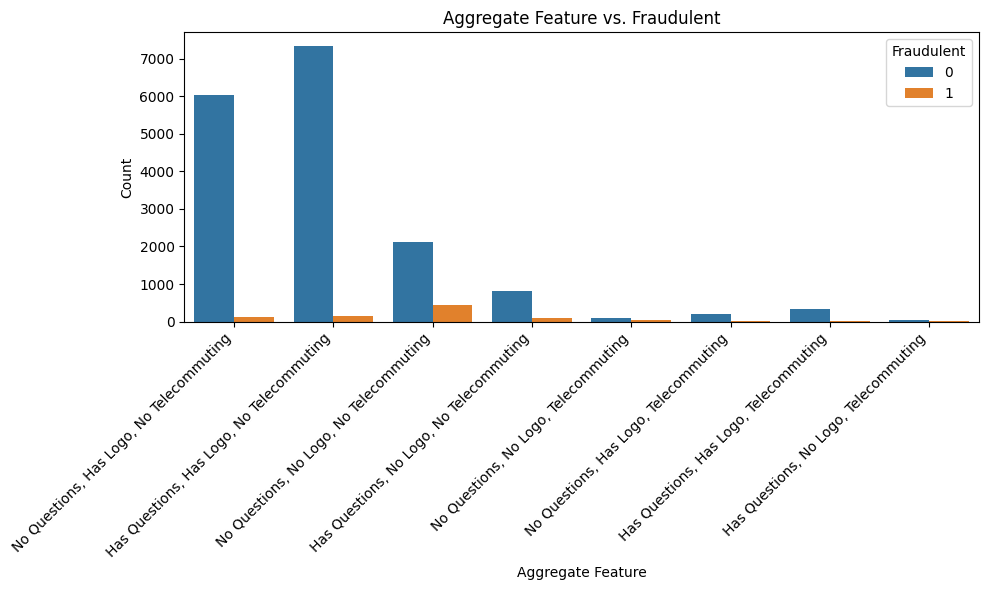

In [28]:
import pandas as pd
import seaborn as sns

# Combine the binary values of input features into a single string
df['aggregate_feature'] = df[['has_questions', 'has_company_logo', 'telecommuting']].astype(str).agg(''.join, axis=1)

# Map the combined strings to unique categories
category_map = {
    '000': 'No Questions, No Logo, No Telecommuting',
    '001': 'No Questions, No Logo, Telecommuting',
    '010': 'No Questions, Has Logo, No Telecommuting',
    '011': 'No Questions, Has Logo, Telecommuting',
    '100': 'Has Questions, No Logo, No Telecommuting',
    '101': 'Has Questions, No Logo, Telecommuting',
    '110': 'Has Questions, Has Logo, No Telecommuting',
    '111': 'Has Questions, Has Logo, Telecommuting'
}
df['aggregate_feature'] = df['aggregate_feature'].map(category_map)

# Plot the aggregate feature against the output feature
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='aggregate_feature', hue='fraudulent')
plt.xlabel('Aggregate Feature')
plt.ylabel('Count')
plt.title('Aggregate Feature vs. Fraudulent')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Fraudulent', loc='upper right')
plt.tight_layout()
plt.show()

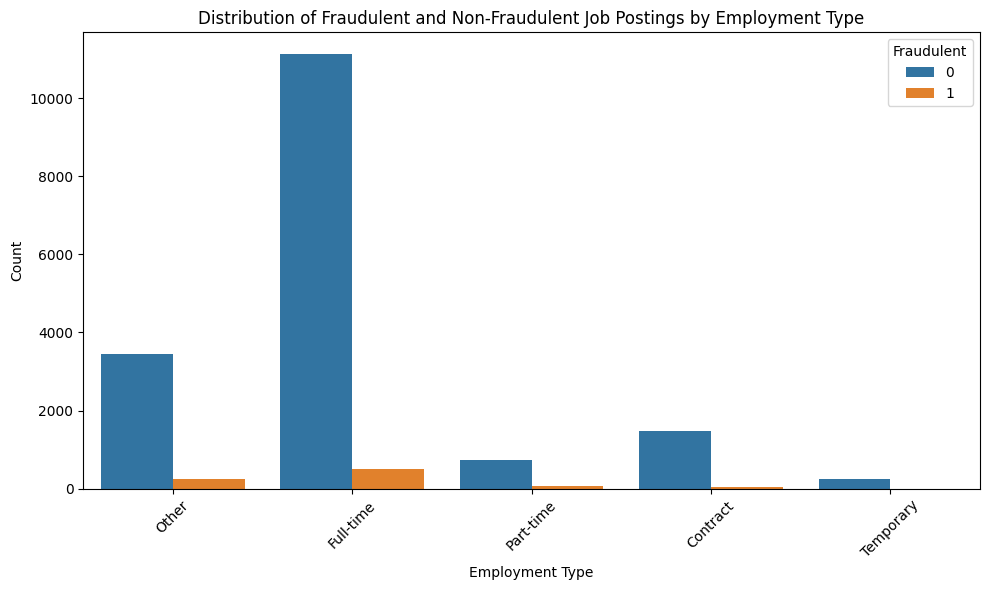

In [29]:
import seaborn as sns
import matplotlib.pyplot as plt

# Plotting the distribution
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='employment_type', hue='fraudulent')
plt.title('Distribution of Fraudulent and Non-Fraudulent Job Postings by Employment Type')
plt.xlabel('Employment Type')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend(title='Fraudulent', loc='upper right')
plt.tight_layout()
plt.show()

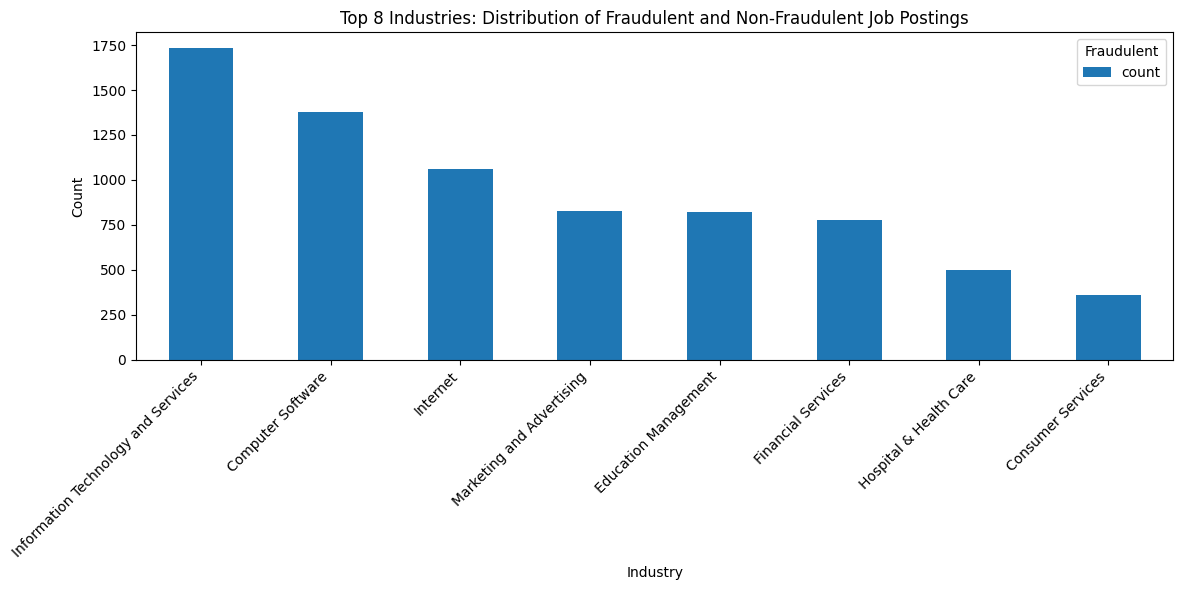

In [30]:
import matplotlib.pyplot as plt

# Assuming 'industry' and 'fraudulent' are columns in the dataset
top_8_industries = df['industry'].value_counts().nlargest(8)

plt.figure(figsize=(12, 6))
top_8_industries.plot(kind='bar', stacked=True)
plt.title('Top 8 Industries: Distribution of Fraudulent and Non-Fraudulent Job Postings')
plt.xlabel('Industry')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')  # Adjust rotation angle and alignment
plt.legend(title='Fraudulent', loc='upper right')
plt.tight_layout()
plt.show()

<Figure size 1200x600 with 0 Axes>

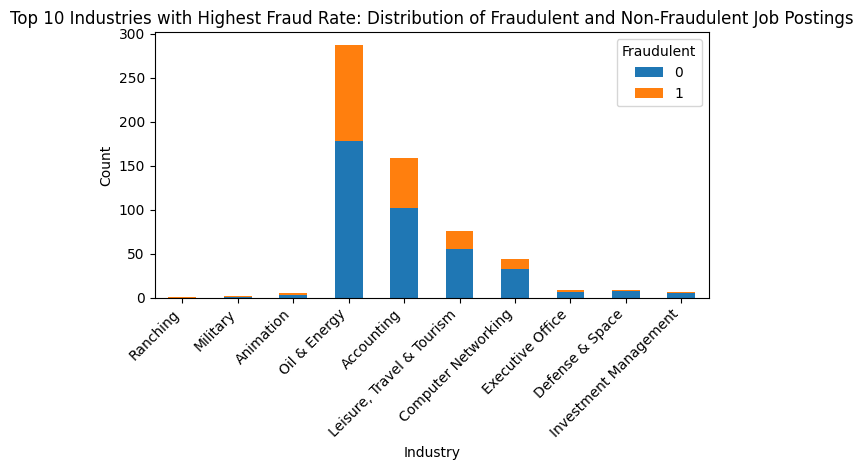

In [31]:
# Assuming 'fraudulent' column is available in the original DataFrame 'df'
# Calculate the counts of fraudulent and non-fraudulent job postings for each industry
industry_counts = df.groupby(['industry', 'fraudulent']).size().unstack()

# Fill NaN values with 0 (if any)
industry_counts = industry_counts.fillna(0)

# Calculate the fraud rate for each industry
industry_counts['Fraud Rate'] = industry_counts[1] / industry_counts.sum(axis=1)

# Sort industries by fraud rate in descending order
industry_counts = industry_counts.sort_values(by='Fraud Rate', ascending=False)

# Select the top 10 industries with the highest fraud rate
top_10_fraudulent_industries = industry_counts.head(10)

# Plot the distribution of fraudulent and non-fraudulent job postings for the top 10 fraudulent industries
plt.figure(figsize=(12, 6))
top_10_fraudulent_industries.drop(columns='Fraud Rate').plot(kind='bar', stacked=True)
plt.title('Top 10 Industries with Highest Fraud Rate: Distribution of Fraudulent and Non-Fraudulent Job Postings')
plt.xlabel('Industry')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')  # Adjust rotation angle and alignment
plt.legend(title='Fraudulent', loc='upper right')
plt.tight_layout()
plt.show()

In [32]:
import os
def export_graph():
    graph_path = os.path.join('static','graph.png') 
    plt.savefig(graph_path)
    plt.close()
    return graph_path

In [33]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, mean_squared_error
import matplotlib.pyplot as plt
import seaborn as sns

# Create a range of values for n_neighbors
n_neighbors_range = list(range(1, 31))

# Create a parameter grid
param_grid = {'n_neighbors': n_neighbors_range}

# Create a KNN classifier object
knn_classifier = KNeighborsClassifier()

# Create a GridSearchCV object
grid_search = GridSearchCV(knn_classifier, param_grid, cv=5, scoring='accuracy')

# Fit the GridSearchCV object to the training data
grid_search.fit(X_train, y_train)

# Get the best hyperparameters
best_params = grid_search.best_params_

# Create a new KNN classifier with the best hyperparameters
best_knn = KNeighborsClassifier(**best_params)
best_knn.fit(X_train, y_train)
best_knn_test = best_knn;

# Make predictions on the test set
y_pred = best_knn.predict(X_test[0].reshape(1, -1))
y_pred_test = best_knn_test.predict(X_test)

In [34]:
print(X.shape)

(17880, 140)


In [35]:
import pickle
with open('C:\\Users\\snpav\\OneDrive\\Desktop\\DIC final_phase3\\DIC final\\models\\model.pkl', 'wb') as file:
    pickle.dump(best_knn, file)

In [36]:
with open('C:\\Users\\snpav\\OneDrive\\Desktop\\DIC final_phase3\\DIC final\\models\\model_test.pkl', 'wb') as file:
    pickle.dump(best_knn_test, file)